In [64]:
random_state = 456

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# ANN class from scratch (single neuron) [For classification only]

In [75]:
class my_ANN:
    def __innit__(self):
        self.weights = None
        self.bias = None
    
    def sigmoid(self,nums):
        nums = np.array(nums)    
        for i in range(len(nums)):
            nums[i] = 1/(math.exp(-nums[i])+1)
        return nums
    
    def log_loss(self,y,_y):
        y = list(y)
        _y = list(_y)
        for i in range(len(_y)):
            if _y[i] == 0: # making slightly bigger than zero
                _y[i] = 1e-15
            elif _y[i] == 1: # making slightly lesser than one
                _y[i] = 1-1e-15
        loss_arr = []
        loss = 0
        for i in range(len(y)):
            loss_arr.append(y[i]*math.log(_y[i]) + (1 - y[i])*math.log(1 - _y[i]))
        loss = -np.mean(np.array(loss_arr))
        return loss
    
    def slope_of_weights(self,x,y,_y):
        slopes = []
        length = len(y)
        _range = x.shape[1]
        y = np.array(y)
        _y = np.array(_y)
        for i in range(_range):
            slopes.append(sum((_y - y) * x.iloc[:,i])/length)
        return slopes
    
    def slope_of_bias(self,y,_y):
        return sum(_y - y)/len(y)
    
    def get_weights(self,):
        return (self.weights,self.bias)
    
    def predict(self,x,weights,bias):
        _y = x.iloc[:,0]*weights[0]
        
        for i in range(1,x.shape[1]):
            _y += x.iloc[:,i]*weights[i]
        _y += bias
        return self.sigmoid(_y)
    
    def evaluate(self,x,y):
        _y = [1 if i>0.5 else 0 for i in self.predict(x,self.weights,self.bias)]
        y = list(y)

        count = 0
        for i in range(len(y)):
            if y[i] == _y[i]:
                count += 1

        return count/len(y)
    
    def fit(self,x_train, y_train, epochs, learning_rate = 0.5): # gradient_descent
        weights = [1 for i in range(x_train.shape[1])]
        bias = 0
        learning_rate = learning_rate

        for i in range(epochs):
            _y = self.predict(x_train,weights,bias)
            loss = self.log_loss(y_train,_y)

            weight_slopes = self.slope_of_weights(x_train, y_train, _y)
            bias_slopes = self.slope_of_bias(y_train, _y)

            for j in range(len(weight_slopes)):
                weights[j] -= weight_slopes[j]*learning_rate
            bias -= bias_slopes*learning_rate

            print(f'Epoch: {i}--loss= {loss}--weights= {weights}--bias= {bias} --->')
        
        self.weights = weights
        self.bias = bias

# Dataset

In [40]:
df = pd.read_csv('./datasets/Csv_employee_retention.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [41]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

<AxesSubplot:>

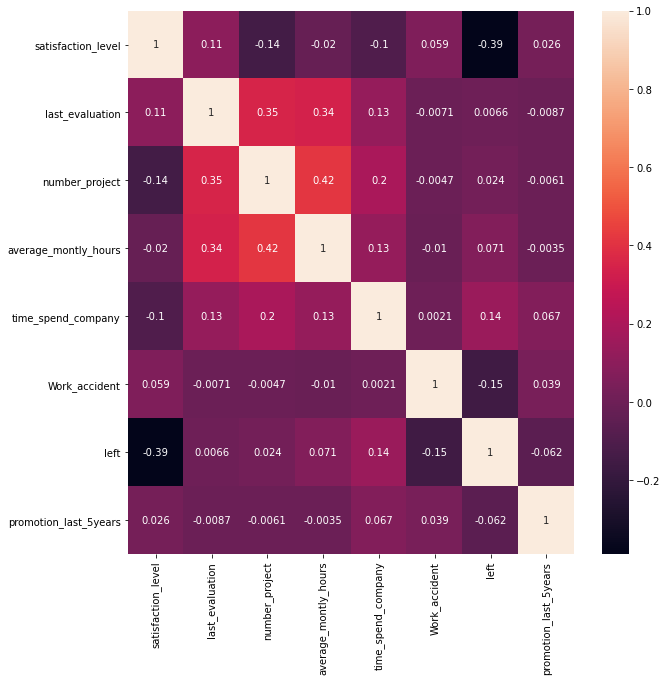

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [60]:
form_dict = lambda x: {x[i]:i for i in range(len(x))}

df2 = df.copy()

df2.Department = df2.Department.map(form_dict(df.Department.unique()))
df2.salary = df2.salary.map(form_dict(df.salary.unique()))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('left',axis = 1),df2.left, stratify=df2.left,train_size=0.8,random_state=random_state)

In [66]:
scaler = MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test2 = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

# Training Model using custome ANN

In [93]:
model = my_ANN()
model.fit(X_train2,y_train,epochs=1000)

Epoch: 0--loss= 2.436405272752781--weights= [0.7751436577421178, 0.8032000387579836, 0.8721797084780365, 0.8285664672287928, 0.9394232356471908, 0.933960810378569, 0.9907271309804375, 0.8654203102431115, 0.882798416461107]--bias= -0.3479619531337287 --->
Epoch: 1--loss= 1.8642185591963683--weights= [0.5660691087924944, 0.6207510745793529, 0.7531796745826354, 0.6699501772390182, 0.8834157227365403, 0.870107524321265, 0.9816583041718145, 0.7399899364741955, 0.7724424672691406]--bias= -0.6669035620746133 --->
Epoch: 2--loss= 1.388342661722047--weights= [0.38283532617875604, 0.46238123534081577, 0.6492650971083255, 0.5326674603747057, 0.8349172409088204, 0.8103308116406945, 0.9729684696086592, 0.6298598484310958, 0.6738014921058486]--bias= -0.9402195569854515 --->
Epoch: 3--loss= 1.0424940968418976--weights= [0.23348033769019688, 0.33624742699643717, 0.5658324859415083, 0.4237922892708429, 0.7964609453275459, 0.75678438889263, 0.9648709501882771, 0.5403614702078409, 0.591302862055564]--bia

Epoch: 35--loss= 0.5303952602578244--weights= [-0.6160544200942288, 0.08791696597317288, 0.3540243639912923, 0.26954513312836176, 0.805276289545455, 0.15778574652268465, 0.8328775175301015, 0.2148257967144764, 0.04963433712552393]--bias= -1.5222535065379268 --->
Epoch: 36--loss= 0.5293207797542495--weights= [-0.6292565823766094, 0.09106296939568641, 0.35419758258667783, 0.27413059952630103, 0.8091366186511724, 0.14551616059315992, 0.8295103748663681, 0.21284926048964675, 0.04066219564257052]--bias= -1.5142496033020822 --->
Epoch: 37--loss= 0.5282642019603339--weights= [-0.6423678530879189, 0.09416603223043012, 0.35431846938989253, 0.2786642190527636, 0.8129736431157806, 0.1333902017933253, 0.8261585889049058, 0.21088831309514525, 0.03176924226860516]--bias= -1.5062703980551018 --->
Epoch: 38--loss= 0.527225139534827--weights= [-0.655390259687772, 0.09722536590904665, 0.3543867675100293, 0.2831453580542653, 0.8167871149083724, 0.12140516437457563, 0.8228219983930439, 0.20894191939772377

Epoch: 71--loss= 0.5007010293482899--weights= [-1.0414718156816847, 0.17546798531663305, 0.3301734745606462, 0.40370510236015433, 0.930254051438795, -0.20841735472177075, 0.720512595272219, 0.15096486985703841, -0.2300700276396928]--bias= -1.2532185287665933 --->
Epoch: 72--loss= 0.5000819915390495--weights= [-1.051975250229897, 0.17725403819116342, 0.3287609054235787, 0.4066389607075838, 0.933359285756085, -0.21675128109261946, 0.7176291952470265, 0.14937843653784222, -0.23672056631532934]--bias= -1.246286159563639 --->
Epoch: 73--loss= 0.4994714295506166--weights= [-1.062414839330545, 0.17901174725865843, 0.32731548744861966, 0.4095368698022879, 0.9364473533331832, -0.22500372424466697, 0.7147574576802139, 0.1478013173349979, -0.24331804288565698]--bias= -1.2393802201260768 --->
Epoch: 74--loss= 0.498869180142988--weights= [-1.0727911088450497, 0.18074157182311468, 0.32583776992891716, 0.4123993208523459, 0.9395184391070102, -0.23317585067978103, 0.7118972920260103, 0.146233448917688

Epoch: 107--loss= 0.4827821649742619--weights= [-1.3829241747041963, 0.22479291363872417, 0.26215107675902094, 0.4898067283818438, 1.0323995968795199, -0.46433806772295705, 0.6234451339831386, 0.0992484641681749, -0.4395287545548748]--bias= -1.0190489864263708 --->
Epoch: 108--loss= 0.4823877462004023--weights= [-1.3914353740213914, 0.2258012826031309, 0.2598547386014304, 0.4917112853307558, 1.0349858795065403, -0.47034523225555463, 0.6209287712777981, 0.0979554585035382, -0.4445656152055155]--bias= -1.0129633445884723 --->
Epoch: 109--loss= 0.48199776229418484--weights= [-1.3998993931467356, 0.22679391307191624, 0.25754128571080703, 0.49359379481768034, 1.0375601862031472, -0.47630221691053437, 0.6184211965075594, 0.09666937961310952, -0.4495653033405393]--bias= -1.0068987685171231 --->
Epoch: 110--loss= 0.48161214089820925--weights= [-1.4083166247777283, 0.22777106043563797, 0.25521105156964197, 0.4954545490788727, 1.0401226260746324, -0.48220964385185516, 0.6159223419860012, 0.09539

Epoch: 143--loss= 0.4709382153694686--weights= [-1.6621959092454837, 0.25278607424661165, 0.17082503663185608, 0.5463441020215204, 1.1186603183568111, -0.65289001643668, 0.5379459607383471, 0.05664246864495085, -0.5997680576371264]--bias= -0.8125663012193878 --->
Epoch: 144--loss= 0.470666918337676--weights= [-1.66923068936676, 0.25336329323767803, 0.1680923006351763, 0.5476127056144586, 1.1208748322426987, -0.6574199520567091, 0.5357077163224242, 0.055562571648090336, -0.6036656189836883]--bias= -0.8071820406383293 --->
Epoch: 145--loss= 0.4703981978276326--weights= [-1.676230242624304, 0.25393182894738664, 0.16535188300752704, 0.5488675586028625, 1.1230805104327102, -0.6619168680044968, 0.5334762016230858, 0.05448763970449408, -0.6075366343523179]--bias= -0.8018158196886698 --->
Epoch: 146--loss= 0.4701320187170177--weights= [-1.6831948430006847, 0.2544918260513086, 0.1626039818812294, 0.5501088371198469, 1.1252774212193404, -0.666381118460578, 0.5312513694841436, 0.05341762755321757

Epoch: 179--loss= 0.46257736380397213--weights= [-1.8950582742610245, 0.26901015517702087, 0.06886713919899755, 0.5844797658998652, 1.1932598511927788, -0.7974219682156466, 0.46129838842028614, 0.020598567437643364, -0.7249125216021923]--bias= -0.6296449387972496 --->
Epoch: 180--loss= 0.4623805945860852--weights= [-1.9009792992957166, 0.2693519762174206, 0.0659644031421499, 0.5853491035005098, 1.1951941015278402, -0.8009543297168046, 0.45927581902874054, 0.01967219447153577, -0.7279873982398679]--bias= -0.6248710160819863 --->
Epoch: 181--loss= 0.462185460942497--weights= [-1.9068734060079242, 0.2696891476100645, 0.06305957004719255, 0.5862097460523954, 1.197121535476872, -0.804463737501213, 0.45725854751423956, 0.018749441164057377, -0.7310428534535324]--bias= -0.620112991567504 --->
Epoch: 182--loss= 0.4619919440735161--weights= [-1.9127407851590175, 0.2700217528781702, 0.060152756637801286, 0.5870618023421932, 1.1990421983558621, -0.8079504070953663, 0.45524654091991046, 0.01783027

Epoch: 212--loss= 0.4568559260969087--weights= [-2.0772083291657406, 0.2782438614866721, -0.027458811103399865, 0.6091170940372242, 1.2537201337235704, -0.9029428061417198, 0.39718321290833725, -0.0082096178591018, -0.8169456861470205]--bias= -0.4802216984607959 --->
Epoch: 213--loss= 0.4567046175467351--weights= [-2.0823323889484655, 0.27847021850940473, -0.03037762879263729, 0.6097499784341406, 1.2554510006673785, -0.9058180491189796, 0.3953196616804006, -0.009030497416329738, -0.8194565274796501]--bias= -0.47594583879553864 --->
Epoch: 214--loss= 0.4565544540267452--weights= [-2.0874349452241323, 0.2786941127785333, -0.03329548501288392, 0.610377109439152, 1.2571763256220903, -0.908676203604517, 0.3934604698178419, -0.009848573135943301, -0.8219524918407705]--bias= -0.47168425523083407 --->
Epoch: 215--loss= 0.4564054240546105--weights= [-2.092516137060856, 0.27891559500337654, -0.03621230904271352, 0.6109985582660231, 1.2588961410671027, -0.9115174134993026, 0.391605613110526, -0.0

Epoch: 248--loss= 0.4520565457827663--weights= [-2.249049702302448, 0.28516203383788813, -0.13148483055380064, 0.628736304561052, 1.31275500878246, -0.9966242321987503, 0.33268081407310396, -0.036123968909655094, -0.8987277693336857]--bias= -0.33496575676499285 --->
Epoch: 249--loss= 0.4519402054722282--weights= [-2.2534788689838345, 0.2853268077409724, -0.13433149488578586, 0.6292011932481972, 1.3143048356415121, -0.9989644241071224, 0.33096036240304183, -0.03685490119330481, -0.9007685980283658]--bias= -0.3311759685970116 --->
Epoch: 250--loss= 0.45182467917130076--weights= [-2.2578908231396704, 0.28549053225065607, -0.13717524666286904, 0.6296624051184857, 1.315850120374829, -1.001291817234257, 0.3292435193322286, -0.03758361404679217, -0.9027980901301779]--bias= -0.32739889430843955 --->
Epoch: 251--loss= 0.45170995965626143--weights= [-2.2622856655664494, 0.28565323642509755, -0.14001604655219568, 0.630119985629157, 1.317390886456569, -1.003606508637125, 0.32753026711315664, -0.03

Epoch: 281--loss= 0.44861090744875437--weights= [-2.386640766693535, 0.29018674010218554, -0.22369785775621537, 0.6423630623502975, 1.361621496552396, -1.0675844555494483, 0.2777200293224606, -0.05913739348234267, -0.9605100935198803]--bias= -0.21639669025537495 --->
Epoch: 282--loss= 0.4485180325641237--weights= [-2.3905507948375226, 0.2903299724819381, -0.22643097125454806, 0.6427278451878861, 1.3630328286862874, -1.0695485861147487, 0.2761100259791271, -0.05980113406079796, -0.9622165449396871]--bias= -0.21300543535593272 --->
Epoch: 283--loss= 0.4484257720718775--weights= [-2.394446528217839, 0.290472904295855, -0.2291601851358004, 0.6430901920128249, 1.364440299572905, -1.071502658345026, 0.2745031147096729, -0.060463010131459514, -0.9639140245176618]--bias= -0.20962560092898427 --->
Epoch: 284--loss= 0.4483341209821021--weights= [-2.3983280435414076, 0.2906155524309767, -0.23188547813190444, 0.6434501331512222, 1.3658439271720908, -1.0734467423357867, 0.2728992818471524, -0.06112

Epoch: 317--loss= 0.4456216781119152--weights= [-2.5189101845765918, 0.29525873144472464, -0.3195047573349725, 0.6541569868126694, 1.4101174874805318, -1.1324210326553201, 0.22161604763707965, -0.08191507645849541, -1.0167004253624352]--bias= -0.10124572759917984 --->
Epoch: 318--loss= 0.4455481124079829--weights= [-2.5223499287815567, 0.2953999380043601, -0.3220868587739433, 0.6544507945053104, 1.4114002234162601, -1.1340629669443505, 0.2201094293047315, -0.08251662535736334, -1.0181192025777277]--bias= -0.0982428045482394 --->
Epoch: 319--loss= 0.44547500986310595--weights= [-2.5257777973090523, 0.29554129568080506, -0.3246645301492282, 0.6547430549669351, 1.412679667118409, -1.1356970034896925, 0.21860546935507605, -0.08311657443830389, -1.0195309272986177]--bias= -0.09525002109188482 --->
Epoch: 320--loss= 0.44540236698919006--weights= [-2.529193848438742, 0.2956828131366259, -0.3272377626007291, 0.6550337877329415, 1.413955832377765, -1.1373231930315142, 0.21710415726463586, -0.08

Epoch: 352--loss= 0.44330121694633784--weights= [-2.632595707005121, 0.30033917377727776, -0.4071972181692289, 0.6636359327025749, 1.453139904371363, -1.185500465435088, 0.1704008637792302, -0.10205419393083691, -1.0624417534114137]--bias= -0.001960639560580192 --->
Epoch: 353--loss= 0.443241980951845--weights= [-2.6356519047066986, 0.30048979898671496, -0.40962055657064317, 0.663885792807043, 1.4543150370272637, -1.186893567295351, 0.16898146974810158, -0.10260300723800109, -1.0636385999018239]--bias= 0.0007068499416078814 --->
Epoch: 354--loss= 0.44318310313670056--weights= [-2.6386980388339913, 0.3006407890381262, -0.4120392911959052, 0.6641346648352461, 1.4554873087721574, -1.1882803179454304, 0.16756440493879882, -0.10315040263164132, -1.0648297929720743]--bias= 0.003365324267715144 --->
Epoch: 355--loss= 0.4431245809538505--weights= [-2.6417341549887867, 0.30079214774499435, -0.41445342058828005, 0.6643825614813611, 1.4566567305371259, -1.1896607554360425, 0.16614966101216896, -0

Epoch: 388--loss= 0.4413773891147239--weights= [-2.7365873927883664, 0.30601306782113963, -0.4915353619755627, 0.6720904665077895, 1.4937165198434328, -1.2319060065562146, 0.12071349502368718, -0.1209479239111162, -1.1021991281108652]--bias= 0.08860144118233565 --->
Epoch: 389--loss= 0.44132958581067355--weights= [-2.7393080057924752, 0.3061785575759471, -0.49379307933469835, 0.6723117348501392, 1.4947950888174315, -1.2330924661733753, 0.11937305120245914, -0.1214482589980578, -1.103212514751447]--bias= 0.09096291783689105 --->
Epoch: 390--loss= 0.4412820612159133--weights= [-2.742020022865771, 0.30634449266258007, -0.4960462277519776, 0.6725323853150778, 1.495871151076106, -1.2342737755081914, 0.11803466665990386, -0.12194731664503482, -1.1042213439948698]--bias= 0.09331641860673308 --->
Epoch: 391--loss= 0.44123481344022286--weights= [-2.7447234801787594, 0.3065108739236599, -0.49829481033917455, 0.672752425972119, 1.4969447154178055, -1.2354499635045313, 0.11669833470032248, -0.1224

Epoch: 424--loss= 0.4398193953277036--weights= [-2.8293598780733276, 0.31225399480319616, -0.5699620241874606, 0.6797188646348461, 1.5310257768452642, -1.271568808488845, 0.07370923527939084, -0.13817855168899346, -1.1359881647918642]--bias= 0.16877929740874256 --->
Epoch: 425--loss= 0.43978053416809065--weights= [-2.831792343809748, 0.31243566090934605, -0.5720578153774044, 0.6799223064923521, 1.5320193106996658, -1.2725866941980897, 0.0724389676099316, -0.1386349251801888, -1.136852882122641]--bias= 0.1708702007060082 --->
Epoch: 426--loss= 0.43974189220191406--weights= [-2.8342173882620956, 0.312617770160939, -0.5741491997377679, 0.6801253641504857, 1.5330106256144012, -1.2736003514951306, 0.07117054060923717, -0.13909013330395967, -1.1377138849658508]--bias= 0.17295405590281052 --->
Epoch: 427--loss= 0.43970346799993776--weights= [-2.83663504066783, 0.31280032171402405, -0.5762361829764527, 0.6803280426506786, 1.5339997288109186, -1.27460980281991, 0.0699039488039022, -0.1395441788

Epoch: 460--loss= 0.4385488796022198--weights= [-2.9124527376116363, 0.31906535908102945, -0.6426776691473656, 0.6868330468269327, 1.5654445090197473, -1.3057004892725192, 0.029101784554774374, -0.15389332637951025, -1.1649162849500838]--bias= 0.23978010567621644 --->
Epoch: 461--loss= 0.4385170804526767--weights= [-2.9146353506541725, 0.31926223892336353, -0.6446187281502609, 0.6870253973949433, 1.5663624575659085, -1.30657927134645, 0.02789452934067027, -0.15430944724978174, -1.1656592472967893]--bias= 0.24163200363858484 --->
Epoch: 462--loss= 0.4384854551881023--weights= [-2.916811499601699, 0.3194595141746999, -0.6465556122979477, 0.6872175080847674, 1.5672784253184793, -1.3074545452516344, 0.026688934718645897, -0.15472449765323015, -1.1663991515420307]--bias= 0.24347767807152929 --->
Epoch: 463--loss= 0.43845400271258084--weights= [-2.9189812084889004, 0.31965718310623725, -0.6484883286439972, 0.6874093819582799, 1.568192418306487, -1.3083263286674132, 0.025484996142454426, -0.1

Epoch: 495--loss= 0.4375325901094005--weights= [-2.9851490952545423, 0.3261793610149959, -0.708177963220063, 0.693440496662181, 1.5964321505235832, -1.3344805712269063, -0.012192726219717176, -0.16783634580807769, -1.1892002292661716]--bias= 0.30103062145661097 --->
Epoch: 496--loss= 0.4375062731602849--weights= [-2.987118991828394, 0.32638896209697316, -0.7099772308820306, 0.6936260122185437, 1.5972841800942281, -1.3352463910895929, -0.013344426869411173, -0.16821641676471497, -1.1898450625042043]--bias= 0.3026770332317346 --->
Epoch: 497--loss= 0.43748009602639754--weights= [-2.9890831966421945, 0.3265988905059074, -0.7117725816490464, 0.6938113721333952, 1.5981344239894342, -1.3360092597644346, -0.014494613677078378, -0.16859549917612845, -1.190487341845792]--bias= 0.30431793263503826 --->
Epoch: 498--loss= 0.4374540578522879--weights= [-2.9910417298455747, 0.3268091441297652, -0.7135640231271166, 0.6939965782109055, 1.5989828873402707, -1.3367691914584632, -0.01564329049044872, -0.

Epoch: 531--loss= 0.43666748766805774--weights= [-3.0526179296424494, 0.33391585942637686, -0.7705385995561822, 0.700032320997033, 1.6260155959353597, -1.360287441004177, -0.05272670779901634, -0.18091172570725605, -1.2108921571383913]--bias= 0.35696116488651825 --->
Epoch: 532--loss= 0.43664570482143084--weights= [-3.0543949582903727, 0.33413588274686573, -0.7722016874963733, 0.7002131846966643, 1.6268064204866974, -1.3609553902438896, -0.05382621512671339, -0.18125757688856856, -1.211452574213072]--bias= 0.3584207008565285 --->
Epoch: 533--loss= 0.43662403441512515--weights= [-3.056166963591652, 0.33435615499557075, -0.773861135002203, 0.700393941933749, 1.627595630816687, -1.3616208498431024, -0.05492433682839149, -0.18160251664573865, -1.2120108515233212]--bias= 0.3598753716992315 --->
Epoch: 534--loss= 0.4366024757802887--weights= [-3.0579339625684994, 0.3345766739648057, -0.7755169497662859, 0.7005745936755271, 1.6283832313272186, -1.3622838312808447, -0.05602107618575737, -0.181

Epoch: 566--loss= 0.43596783653463667--weights= [-3.1119325848594737, 0.3417503961089524, -0.8266307700392989, 0.7063046510141213, 1.6527618967977544, -1.3822561475262967, -0.09040579347152145, -0.19248749668012427, -1.2292975550798344]--bias= 0.4052574003001948 --->
Epoch: 567--loss= 0.4359496187854101--weights= [-3.113543446559145, 0.3419778268525234, -0.8281709930309237, 0.7064822558641574, 1.6534987305335207, -1.382843380565106, -0.0914586696905272, -0.19280264832490984, -1.229788794219025]--bias= 0.4065563038097571 --->
Epoch: 568--loss= 0.4359314925264458--weights= [-3.115149838017946, 0.3422054302215882, -0.8297078420662002, 0.7066597786307572, 1.65423409409226, -1.3834284893180018, -0.09251026739191022, -0.193116958380045, -1.2302782181545684]--bias= 0.4078508979287592 --->
Epoch: 569--loss= 0.43591345722740604--weights= [-3.1167517738377017, 0.34243320408665734, -0.8312413246393419, 0.706837219764391, 1.6549679913066255, -1.3840114832080321, -0.09356058941751254, -0.1934304287

Epoch: 602--loss= 0.4353660442219572--weights= [-3.1672081013755786, 0.35003170629185826, -0.8800061725526346, 0.7126493058285659, 1.678388234551746, -1.402122595336728, -0.1275235232124951, -0.20331634880860328, -1.245895318063671]--bias= 0.44940631125542624 --->
Epoch: 603--loss= 0.43535080926907493--weights= [-3.168666812561511, 0.35026404154418567, -0.8814295874708411, 0.7128241657060337, 1.6790744568513505, -1.4026389406571853, -0.12853208653630807, -0.20360239647445055, -1.2463261302435964]--bias= 0.4505590937562048 --->
Epoch: 604--loss= 0.4353356487227109--weights= [-3.170121542668718, 0.35049647565697295, -0.8828498921187399, 0.7129989534684453, 1.679759338304439, -1.403153470654935, -0.12953946700476993, -0.20388767002873814, -1.246755398871152]--bias= 0.45170807110120464 --->
Epoch: 605--loss= 0.435320562162425--weights= [-3.1715723042844637, 0.3507290066780317, -0.884267093620948, 0.7131736692376861, 1.680442882265916, -1.4036661930912808, -0.13054566709302817, -0.204172171

Epoch: 638--loss= 0.43486161036851373--weights= [-3.2173006354935305, 0.3584444711940079, -0.9293397926838709, 0.7188993278410849, 1.7022707754573616, -1.4196204816832814, -0.16310375570571925, -0.21313916590596949, -1.2604784537270137]--bias= 0.4886001379614316 --->
Epoch: 639--loss= 0.4348488071608891--weights= [-3.2186236142938514, 0.3586791786027209, -0.9306556388811191, 0.7190716245469361, 1.702910758909718, -1.4200760884921897, -0.1640712330676881, -0.213398468407724, -1.2608577195308084]--bias= 0.4896238695101256 --->
Epoch: 640--loss= 0.4348360647781232--weights= [-3.2199430353346674, 0.35891391844030507, -0.9319686234819133, 0.7192438498300452, 1.7035495151722493, -1.4205301354476083, -0.16503761125352095, -0.213657060300834, -1.2612356641262985]--bias= 0.49064423957180064 --->
Epoch: 641--loss= 0.4348233828849249--weights= [-3.2212589095534865, 0.3591486889793248, -0.9332787531548684, 0.7194160036197876, 1.7041870472054865, -1.4209826289941467, -0.166002892438284, -0.21391494

Epoch: 674--loss= 0.4344367376243426--weights= [-3.262762210751707, 0.36690242483706387, -0.9749542702560319, 0.7250563023427692, 1.7245576195120755, -1.4350837911621073, -0.1972555599200651, -0.22203840592461807, -1.2733378302336165]--bias= 0.5234166997224264 --->
Epoch: 675--loss= 0.4344259268923642--weights= [-3.2639637165626967, 0.36713725882694037, -0.9761712037909409, 0.725225959103498, 1.7251552209198844, -1.4354870824607622, -0.19818478561630706, -0.22227318265733734, -1.2736728475179082]--bias= 0.5243263972152328 --->
Epoch: 676--loss= 0.43441516612626796--weights= [-3.2651620336594034, 0.36737206725196014, -0.9773855072639923, 0.7253955398714953, 1.725751695773848, -1.4358890267739899, -0.19911298595428203, -0.2225073084901991, -1.274006727123805]--bias= 0.5252331234711576 --->
Epoch: 677--loss= 0.4344044550572094--weights= [-3.2663571716097444, 0.36760684862506676, -0.9785971868534078, 0.7255650444723658, 1.726347046704624, -1.436289629491992, -0.20004016286058668, -0.222740

Epoch: 709--loss= 0.4340864137826848--weights= [-3.3029784876299546, 0.3750970194970028, -1.0160217733408676, 0.7309478428147379, 1.7448201600156477, -1.4484314872140074, -0.22918066160422726, -0.22987866196781465, -1.2844156076612359]--bias= 0.5535527542430123 --->
Epoch: 710--loss= 0.4340772019835306--weights= [-3.3040738627472233, 0.3753301174557961, -1.0171502407663642, 0.7311147253752696, 1.7453798443458912, -1.448790677637011, -0.2300751065404025, -0.23009159353114791, -1.2847134120393227]--bias= 0.5543642631314553 --->
Epoch: 711--loss= 0.43406803164025576--weights= [-3.3051663644280493, 0.37556314174851363, -1.018276286196639, 0.73128152493259, 1.7459384894467407, -1.449148695114287, -0.23096859000493428, -0.23030392867172414, -1.2850102275593973]--bias= 0.5551731350936701 --->
Epoch: 712--loss= 0.43405890253490714--weights= [-3.306256001118925, 0.37579609111859014, -1.0193999153306816, 0.7314482412662837, 1.7464960976768442, -1.4495055442050242, -0.23186111372177295, -0.230515

Epoch: 745--loss= 0.43377942285303817--weights= [-3.34066034892721, 0.3834335383004663, -1.055160643114137, 0.7369017154263113, 1.7643305112575147, -1.4606547242058505, -0.26078695750991426, -0.23717903053357142, -1.2945402373201702]--bias= 0.5811679059918701 --->
Epoch: 746--loss= 0.4337715748788361--weights= [-3.3416573989170164, 0.38366323778167416, -1.056205413368515, 0.7370654672268373, 1.7648542198596924, -1.460974415080985, -0.2616478390534913, -0.23737141877288107, -1.294804760438144]--bias= 0.5818899056623125 --->
Epoch: 747--loss= 0.4337637612690568--weights= [-3.3426518618970724, 0.38389282231743743, -1.0572479583791425, 0.7372291277997345, 1.7653769698391641, -1.4612930844923155, -0.2625078180111706, -0.23756326298277522, -1.2950684233259575]--bias= 0.5826095714920277 --->
Epoch: 748--loss= 0.43375598184722497--weights= [-3.3436437453321455, 0.38412229087426486, -1.0582882833682212, 0.7373926969128562, 1.7658987633148344, -1.4616107363002073, -0.26336689593034035, -0.237754

Epoch: 781--loss= 0.4335173430555104--weights= [-3.374976189876469, 0.3916232681863895, -1.0914070039940003, 0.7427376574873349, 1.7825948640356548, -1.4715466406534363, -0.29122085407616327, -0.2437721210639937, -1.3035435825400339]--bias= 0.6057442236801179 --->
Epoch: 782--loss= 0.4335106279376293--weights= [-3.3758846369876028, 0.3918482199316144, -1.0923748647014604, 0.7428979800174813, 1.7830853545856422, -1.471831871325061, -0.2920501863271216, -0.24394578814501552, -1.3037790913509655]--bias= 0.6063869754631268 --->
Epoch: 783--loss= 0.4335039414297883--weights= [-3.3767907507199895, 0.3920730231467261, -1.0933406802009482, 0.7430582030928404, 1.7835749590849135, -1.472116209128688, -0.29287866899379145, -0.24411895994275415, -1.304013848499532]--bias= 0.6070276601811481 --->
Epoch: 784--loss= 0.43349728338843857--weights= [-3.3776945376971326, 0.39229767700146445, -1.0943044552648045, 0.7432183264915393, 1.7840636794455322, -1.4723996573506617, -0.2937063034730258, -0.24429163

Epoch: 817--loss= 0.433292644180771--weights= [-3.4062563071746923, 0.39962233659045815, -1.1249948826260208, 0.7484450605414723, 1.799707657209679, -1.4812750803776422, -0.3205513290784758, -0.24972124636297735, -1.3115674026056732]--bias= 0.6276291593880521 --->
Epoch: 818--loss= 0.4332868740998153--weights= [-3.407084776017026, 0.39984145524260617, -1.1258920378718893, 0.7486016669806614, 1.8001674176023073, -1.4815301394846123, -0.3213509296697872, -0.24987788430731822, -1.3117775099210347]--bias= 0.6282016977038953 --->
Epoch: 819--loss= 0.4332811279384095--weights= [-3.4079111368993815, 0.4000603987108851, -1.1267873123038554, 0.7487581663504517, 1.8006263575571761, -1.4817844154575879, -0.3221497286418624, -0.25003407213859213, -1.3119869578127379]--bias= 0.6287724039068555 --->
Epoch: 820--loss= 0.43327540557927247--weights= [-3.4087353957186135, 0.40027916634604366, -1.1276807102765685, 0.748914558451817, 1.8010844788064582, -1.482037911108097, -0.3229477272621535, -0.25018981

Epoch: 853--loss= 0.4330991900010716--weights= [-3.4347941962893214, 0.4073958771223584, -1.156138005836754, 0.7540140632747574, 1.815754255081374, -1.4899832249705387, -0.3488407884665057, -0.2550850851559942, -1.318732088889913]--bias= 0.6471287108043523 --->
Epoch: 854--loss= 0.43309421154915667--weights= [-3.43555036383563, 0.40760831269184866, -1.1569701173683313, 0.7541666954162948, 1.8161855386899781, -1.4902117804632204, -0.34961230622701284, -0.25522625895595785, -1.318919873089536]--bias= 0.6476389948800406 --->
Epoch: 855--loss= 0.4330892531769201--weights= [-3.4363046243914988, 0.40782055254428273, -1.1578004980361027, 0.7543192138232531, 1.8166160614007096, -1.4904396469060603, -0.3503830659882386, -0.25536702433984115, -1.3191070767086892]--bias= 0.6481476539084821 --->
Epoch: 856--loss= 0.4330843147881347--weights= [-3.4370569832218627, 0.4080325961888735, -1.1586291518110046, 0.7544716183258682, 1.8170458247881822, -1.4906668267153067, -0.3511530689055645, -0.2555073824

Epoch: 888--loss= 0.4329362881225836--weights= [-3.460159022748754, 0.41471166679941024, -1.18425751101673, 0.7592874506604647, 1.8304065431298209, -1.4975879887683412, -0.3754003143166463, -0.2597902908868273, -1.3249718981563718]--bias= 0.6640560548179346 --->
Epoch: 889--loss= 0.4329319584618613--weights= [-3.460851474277314, 0.41491698613478567, -1.1850313397958832, 0.7594360067969678, 1.8308121061356153, -1.4977938022126291, -0.3761459711560864, -0.25991781380781526, -1.3251405122083346]--bias= 0.6645125488617272 --->
Epoch: 890--loss= 0.43292764580387166--weights= [-3.461542193736507, 0.4151220948992661, -1.1858035708101857, 0.7595844437784595, 1.8312169610088698, -1.4979990055325396, -0.3768909087803948, -0.2600449656466954, -1.3253086117012816]--bias= 0.6649675957136023 --->
Epoch: 891--loss= 0.43292335006891475--weights= [-3.462231185852951, 0.41532699273535323, -1.1865742076898356, 0.7597327614660093, 1.8316211091889734, -1.498203600821753, -0.37763512824976786, -0.2601717474

Epoch: 924--loss= 0.43279058704131684--weights= [-3.4840289929165564, 0.42196815228030266, -1.2111341375319957, 0.7645594642731266, 1.8445707556351927, -1.5046273608982894, -0.40179827837993165, -0.26415448540756015, -1.3307299253580982]--bias= 0.6796112212714231 --->
Epoch: 925--loss= 0.43278682215127623--weights= [-3.484661967854846, 0.42216569007744364, -1.2118526689974876, 0.7647036496386678, 1.844951707451128, -1.5048124709134334, -0.4025186937652806, -0.26426927566775293, -1.330881069454302]--bias= 0.6800185074613528 --->
Epoch: 926--loss= 0.432783071644725--weights= [-3.485293372164889, 0.42236300654324244, -1.2125697277144796, 0.7648477114056726, 1.845332000748328, -1.5049970411342897, -0.40323842656349096, -0.2643837301019807, -1.3310317577817548]--bias= 0.6804245082161201 --->
Epoch: 927--loss= 0.43277933545574954--weights= [-3.4859232100857773, 0.42256010143744605, -1.2132853169944802, 0.7649916494669476, 1.8457116368427324, -1.505181073374529, -0.4039574777486955, -0.264497

Epoch: 960--loss= 0.43266366146929325--weights= [-3.5058561310658765, 0.4289385295464794, -1.2360965960561796, 0.7696715555028081, 1.85787936380441, -1.5109637931053137, -0.427310028664696, -0.2680819078878846, -1.3358944636146153]--bias= 0.6934929439960652 --->
Epoch: 961--loss= 0.4326603751977489--weights= [-3.5064351459693723, 0.4291279685695327, -1.2367641361131403, 0.7698112298927959, 1.8582374155479227, -1.5111305641501962, -0.42800646907791856, -0.26818518136182035, -1.3360301143478717]--bias= 0.6938565080502777 --->
Epoch: 962--loss= 0.43265710113959377--weights= [-3.5070127351638116, 0.42931717939592395, -1.2374303174990944, 0.7699507773609949, 1.8585948541855954, -1.5112968564300682, -0.4287022606158716, -0.2682881512482819, -1.3361653603412875]--bias= 0.6942189295610613 --->
Epoch: 963--loss= 0.43265383924010664--weights= [-3.507588902458034, 0.42950616188436824, -1.2380951432369725, 0.7700901978304838, 1.8589516809234587, -1.5114626715216881, -0.4293974041767404, -0.2683908

Epoch: 996--loss= 0.43255267529013924--weights= [-3.5258290192787576, 0.43561370475207556, -1.2592932187914032, 0.7746193706390453, 1.8703914146502953, -1.5166768408513212, -0.4519793908981415, -0.2716144647289062, -1.3405320346197158]--bias= 0.7058872970297313 --->
Epoch: 997--loss= 0.432549796130406--weights= [-3.52635903031169, 0.435794856865202, -1.2599136980418328, 0.7747544330606644, 1.870728134338111, -1.516827328117597, -0.4526530238907063, -0.27170733184881374, -1.3406539111994649]--bias= 0.7062119867972421 --->
Epoch: 998--loss= 0.4325469273792809--weights= [-3.5268877459485264, 0.43597577718797176, -1.2605329228017659, 0.7748893662883847, 1.8710642825849573, -1.5169773897612104, -0.4533260391399047, -0.2717999247859699, -1.3407754275224062]--bias= 0.7065356603527043 --->
Epoch: 999--loss= 0.43254406899116543--weights= [-3.527415169617053, 0.43615646566176564, -1.261150895833231, 0.775024170273246, 1.8713998604985853, -1.5171270271575314, -0.4539984374765446, -0.2718922443185

In [94]:
weights, bias = model.get_weights()
print(weights)
print(bias)

[-3.527415169617053, 0.43615646566176564, -1.261150895833231, 0.775024170273246, 1.8713998604985853, -1.5171270271575314, -0.4539984374765446, -0.27189224431854386, -1.3408965847407581]
0.7068583209889692


In [95]:
model.evaluate(X_test,y_test)

0.238